# Crops Ideal Location for Planting

In the rapidly evolving field of precision agriculture, where informed decision-making is key, I am excited to present a remarkable dataset that empowers farmers with the ability to construct predictive models. The dataset is designed to assist users in recommending the optimal crops to cultivate on a specific farm, leveraging a comprehensive range of parameters. With this invaluable resource at your disposal, you can make data-driven choices and optimize your farming strategies. Explore the possibilities and unlock the potential of precision agriculture with this dataset.


Libraries

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read and view Dataset

In [24]:
# Read the dataset

df2=pd.read_csv("/content/drive/MyDrive/Portfolio/00_Crops/dataset_crops.csv")

# View the dataset
df2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


It is important to familiarize with the dataset knowing the meanig of each column.
For instance N = Nitrogen, P = Phosphorus, K = Potassium ( “Big 3” primary nutrients in commercial fertilizers)
The other columns correspond to temperature, humidy, ph, rainfall and label.
later on will be possible to know the different crops in the column "label"

# 1. Let's familiarize with the dataset - Gaining information from data

### Count of unique values -> df['column_name'].value_counts()

df['column_name'].value_counts() is a method call that is used to obtain the count of unique values in a specific column of a DataFrame.

In [3]:
# Count unique values in Column "Label"
print(len(df['label'].value_counts()))


15


There are 15 different crops in this dataset. However,  it is possible to find misspeling in some words, which could add another crop. That is the reason why it is important to check each label.

In [4]:
# Count and group by unique values in Column "Label"

df['label'].value_counts()


rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: label, dtype: int64

After reading the different values in Label there are 15 different crops and no misspeling.

### Data set dimenssions -> df.shape
df.shape is an attribute that is used to determine the dimensions or shape of a DataFrame object. It returns a tuple that has two elements representing the number of rows and columns in the DataFrame. The tuple has :

(num_rows, num_columns)

In [5]:
# Data set dimenssions
df.shape

# the dataset has 1,697 rows and 8 columns

(1697, 8)

### Dataset summary -> df.info()

df.info() is a method used to display a concise summary of a DataFrame. It provides information about the DataFrame's structure, including the column names, data types, and the number of non-null values.

In [19]:
# Dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


1 All columns do not have Null Entries

2 Seven columns are numerical type

3 Only a single column is categorical type

### Statistical Insight

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


Mean values,
Standard Deviation ,
Minimum Values,
Maximum Values

### Checking For Duplicate Entries

Find rows that are exactly the same across all columns and sort by the columns N and P

In [29]:
df[df.duplicated(keep=False)].sort_values(by=['N', 'P'])

,N,P,K,temperature,humidity,ph,rainfall,label
1207,0,18,14,29.771494,92.007200,7.207991,114.416179,orange
1645,0,18,14,29.771494,92.007200,7.207991,114.416179,orange
1221,0,25,14,19.335168,91.979789,6.361671,116.450422,orange
1659,0,25,14,19.335168,91.979789,6.361671,116.450422,orange
346,0,65,15,23.461683,23.221976,5.645436,95.842534,beans
...,...,...,...,...,...,...,...,...
1606,118,21,34,24.385346,64.725431,7.234258,119.632411,coffee
710,118,88,52,28.650039,82.687525,5.843163,98.750844,banana
1683,118,88,52,28.650039,82.687525,5.843163,98.750844,banana
1437,120,40,33,24.238506,54.303296,6.734105,115.156401,coffee


There are 260 duplicates. Duplicated rows in a dataset can cause overfitting, introduce bias, and skew data distribution, which compromises a decision tree model's ability to generalize and perform accurately on unseen data. This can significantly limit the model's practical effectiveness. Due to the previous reasons the duplicates should be removed.

### Delete duplicates

Drop duplicates and keep only one record-row

In [35]:
df_unique = df.drop_duplicates()
df_unique

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1589,22,67,78,17.366064,14.724575,6.204091,73.326675,Soyabeans
1590,36,65,80,18.487201,16.979216,6.051091,75.874456,Soyabeans
1591,59,60,84,19.230253,18.967256,7.690962,95.709920,Soyabeans
1592,54,77,85,17.341861,17.366243,7.829211,84.746067,Soyabeans


# 2. Decision tree

### A. Slip the dataset between atributes/features and labels

The first step before starting a decision tree is to slip the dataset between atributes/features and labels.

atributes/features: (x - the information you're using to make predictions)

labels: (y- what you're trying to predict.)

In [36]:
x=df_unique.drop(columns="label")
y=df_unique['label']

In [37]:
print(x)

       N   P   K  temperature   humidity        ph    rainfall
0     90  42  43    20.879744  82.002744  6.502985  202.935536
1     85  58  41    21.770462  80.319644  7.038096  226.655537
2     60  55  44    23.004459  82.320763  7.840207  263.964248
3     74  35  40    26.491096  80.158363  6.980401  242.864034
4     78  42  42    20.130175  81.604873  7.628473  262.717340
...   ..  ..  ..          ...        ...       ...         ...
1589  22  67  78    17.366064  14.724575  6.204091   73.326675
1590  36  65  80    18.487201  16.979216  6.051091   75.874456
1591  59  60  84    19.230253  18.967256  7.690962   95.709920
1592  54  77  85    17.341861  17.366243  7.829211   84.746067
1593  43  68  81    17.678094  18.232540  6.761600   79.920602

[1594 rows x 7 columns]


In [38]:
print(y)

0            rice
1            rice
2            rice
3            rice
4            rice
          ...    
1589    Soyabeans
1590    Soyabeans
1591    Soyabeans
1592    Soyabeans
1593    Soyabeans
Name: label, Length: 1594, dtype: object


### B. Import some classes, modules and fuctions

The package used in this opportunity to make a decision tree is  sklearn different class and functions are from preprocessing ,model_selection ,metrics and tree from those modules different funtions will be imported

In [39]:
#First 2 classes - LabelEncoder and StandardScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler


LabelEncoder: transform labels to numerical values because decision tree require numerical input.

StandardScaler: is a tool that takes your dataset and performs standardization on the features. It removes the mean and scales the features to have a variance of one. By doing this, it helps normalize the input variables, making them more suitable for training machine learning models. I know it is a lot! check this deep detail explanation !

Function train_test_split

In [40]:
from sklearn.model_selection import train_test_split

The train_test_split function from the sklearn.model_selection module is a helpful tool that allows you to divide the dataset into training and testing subsets. It facilitates the evaluation of machine learning model's performance before applying it to new data.

Here's how it works:

Input Data: You provide your dataset, which typically consists of input features (also called independent variables) and corresponding target labels (also called dependent variables).

Splitting the Data: The train_test_split function randomly divides the dataset into two parts based on a specified ratio. By convention, the larger portion is used for training the model, while the smaller portion is used for evaluating its performance.

Return Values: The function returns four separate objects: the training features, the testing features, the training labels, and the testing labels. These objects allow you to access and use the different subsets of your data.

Classes: accuracy_score,confusion_matrix functions and ConfusionMatrixDisplay



In [41]:
 from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

 The accuracy_score function allows you to calculate the accuracy of a classification model, the confusion_matrix function generates a matrix summarizing the model's performance, and the ConfusionMatrixDisplay class provides methods to visualize the confusion matrix. These tools help you evaluate and analyze the performance of the classification model.

 in detail...

Accuracy_score: This function is used to measure the accuracy of a classification model's predictions. Given the true labels of a dataset and the predicted labels generated by a model, the accuracy_score function compares them and returns the percentage of correctly classified instances.

Confusion_matrix: This function is used to create a confusion matrix, which is a table that summarizes the performance of a classification model. It takes the true labels and the predicted labels as input and generates a matrix that shows the number of true positives, true negatives, false positives, and false negatives.

ConfusionMatrixDisplay: This is a class that allows you to visualize a confusion matrix in a more user-friendly way. It takes the confusion matrix as input and provides methods to plot it as a heatmap or a table, making it easier to interpret and analyze the performance of your classification model.

Class DecisionTreeClassifier

In [42]:
 from sklearn.tree import DecisionTreeClassifier

The DecisionTreeClassifier class from the sklearn.tree module is a powerful tool for building decision tree models specifically for classification tasks. It enables you to train a decision tree model using your dataset and make predictions on new data based on the learned rules.

Here's how it works:

Input Data: You provide a dataset that includes both input features (independent variables) and corresponding target labels (dependent variable). The features represent the characteristics or attributes of the data points, while the labels indicate the class or category that each data point belongs to.

Training the Model: Using the DecisionTreeClassifier class, you can train the model by fitting it to your training data. During training, the algorithm learns the optimal conditions to split the data based on the features, in order to create decision rules that best separate the classes.

Making Predictions: Once the model is trained, you can use it to make predictions on new, unseen data. Given the input features of a data point, the decision tree traverses the tree structure based on the learned rules and assigns a predicted class label to the data point.

The DecisionTreeClassifier class provides various parameters and methods that allow you to customize and interact with the decision tree model. For example, you can control the maximum depth of the tree, specify the splitting criterion, handle missing values, and more.

# 3.Hands on! buckle up buckaroo


### A. Distribution of Data for taining and testing

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The test_size represents the fraction of the dataset that will be assigned to the test set. test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training. It is a common choice for test_size and is often used as a rule of thumb. It strikes a balance between having enough data for training the model and having a sufficient amount of data for evaluating its performance on unseen examples.

The random_state parameter is used to set a seed value for the random number generator used during the data splitting process. It ensures that the data split is reproducible, meaning that if you run the code with the same random_state value multiple times, you will get the same train-test split each time. The choice of random_state=42 is arbitrary. The number 42 is often used as a placeholder in computer science and has no special significance in this context. The important thing is that using the same **`random_state`** value (e.g., 42) allows you to reproduce the same train-test split if you need to rerun the code later. It helps with reproducibility and allows you to compare results consistently across different runs.

### B. Instantiate the LabelEncoder and StandardScaler classes

In [44]:
le=LabelEncoder()
sc=StandardScaler()

### C. Fit and transform the training target variable and the test target variable


In [45]:
le.fit_transform(y_train)
le.fit_transform(y_test)

array([ 7,  1, 11,  3,  4, 13, 11,  8, 14,  6,  6,  3,  8,  2, 11,  6, 13,
        0, 10,  5,  0,  8,  9,  9, 13,  6, 11,  4,  0,  7,  3, 13, 14,  7,
        0,  5, 12,  4,  4,  5,  0, 13,  4, 13, 11, 12,  6,  6,  6,  3, 13,
       10,  7,  3,  2,  7, 14,  9,  4,  3, 13, 13, 12,  6, 14,  2,  8, 11,
        3, 12,  1,  7,  0, 12,  1, 11, 14, 13,  3, 13,  2,  7, 10, 11,  7,
        4,  6, 10, 11,  9,  9,  5, 13,  2, 10,  0,  3,  1,  3,  8, 12,  7,
        8, 10, 10,  1, 12,  6, 12,  2,  0,  9,  4,  6,  8,  9,  3,  3,  2,
        0, 13, 13, 10, 10, 13,  0,  8,  3, 12, 12, 13,  9,  0,  2,  3, 10,
        0, 11,  6, 13, 12,  9,  2,  7,  8,  7,  9,  0,  1,  3,  6, 14,  5,
        8,  5,  3, 12,  0,  5,  1,  7,  3,  2,  9, 10,  6, 11,  1,  2,  8,
        1,  8, 10,  0,  3,  9, 14, 14,  0, 13,  4,  0, 14,  5,  0, 10,  0,
       13, 14,  9, 13,  1,  5,  9, 14,  7,  3, 10, 13,  3,  4,  2, 12,  3,
        8,  9, 13,  2,  6,  8,  6, 14,  1,  3,  8, 10,  8, 12, 12,  9,  1,
        5,  1, 12, 12,  3

Fits the LabelEncoder object to the training target variable "y_train" and to the testing target variable "y_test" and transforms the labels into encoded numerical values.

### D. Understand the distribution of the features to later normalize the features

In [47]:
sc.fit(x_train)

StandardScaler()

During this process, the scaler computes the necessary statistics (e.g., mean, standard deviation) from X_train to understand the distribution of the features.The scaler object is then ready to transform the training data or any other dataset using the learned statistics.

Lets keep in mind that the purpose of scaling or normalization is to bring the features to a similar scale or range, which can help improve the performance and convergence of certain machine learning algorithms, including decision trees. Scaling ensures that no single feature dominates the learning process due to its larger magnitude, thus preventing biased model behavior.

### E. Normalize the features

In [48]:
sc.transform(x_train)
sc.transform(x_test)

array([[-1.32543396,  2.25199775,  2.62862792, ...,  0.62285702,
        -0.13242247, -0.54438972],
       [-0.49193048,  2.02132053,  2.62862792, ...,  1.15228186,
        -0.46250269,  0.16376708],
       [-1.03891714, -1.12165672, -0.68224086, ...,  1.18526399,
         0.27708334,  0.16745893],
       ...,
       [-0.72635334,  0.63725715,  0.51383215, ..., -2.05812949,
         1.20920339, -0.5268441 ],
       [-1.11705809,  0.40657992, -0.57823451, ..., -1.70510115,
        -0.56350587,  0.26980129],
       [-1.16915206,  2.28083241,  2.54195596, ...,  1.03247525,
        -0.91693017,  0.06527413]])

sc.transform(x_train) and sc.transform(x_test) are used to apply the same data scaling or normalization transformation to both the training data x_train and the testing data x_test.

sc.transform(x_train) applies the scaling or normalization transformation to the training data x_train. It uses the statistics learned during the fitting step to transform the features in x_train accordingly.

sc.transform(x_test) applies the same scaling or normalization transformation to the testing data x_test. This ensures that the scaling is consistent between the two datasets, as the same scaling parameters learned from x_train are used.

By applying the same transformation to both the training and testing data, you ensure that the features are scaled or normalized in a consistent and comparable manner. This helps to avoid introducing bias or inconsistencies during model training and evaluation.

### F. Initializes a decision tree classifier object

In [49]:
dtc=DecisionTreeClassifier()

### G. Train a decision tree classifier model using the training data.

In [50]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

When you call dtc.fit(X_train, y_train), the decision tree classifier model learns from the training data by analyzing the patterns and relationships between the input features and the target labels. It constructs a tree-based model that can be used to make predictions. By fitting the decision tree classifier to the training data, you enable it to learn from the provided examples and generalize that knowledge to make predictions on new, unseen instances.

dtc.fit(x_train, y_train) is used to train a decision tree classifier model using the training data. This line of code fits the decision tree classifier object (dtc) to the input features (x_train) and the corresponding target labels (y_train).

In detail:

fit() is a method of the decision tree classifier object that is used to train the model.

X_train represents the training data, which consists of the input features (independent variables).

y_train represents the corresponding target labels for the training data.

### G. Executes the decision tree classifier's prediction algorithm

In [51]:
y_pred=dtc.predict(x_test)

y_pred = dtc.predict(X_test) executes the decision tree classifier's prediction algorithm on the test dataset and stores the predicted values in the y_pred variable for further analysis or evaluation.

predict(): This is a method provided by the decision tree classifier object. When called with the test dataset (x_test), it applies the trained decision tree model to the test dataset and generates predictions for each input instance.

### H. accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

1.0

By calling accuracy_score(y_test, y_pred), you obtain the accuracy of the decision tree model on the test dataset. The output of this function call will be a decimal value representing the accuracy score, typically ranging from 0 to 1, where a value of 1 indicates perfect accuracy. The accuracy score is defined as the number of correct predictions divided by the total number of predictions.

### I. Confucion Matrix

In [53]:
cm = confusion_matrix(y_test, y_pred)

The confusion_matrix() function then compares the true labels (y_test) with the predicted labels (y_pred) and constructs a confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix has four elements:

True Positive (TP): The number of observations that are actually positive and are predicted correctly as positive.
True Negative (TN): The number of observations that are actually negative and are predicted correctly as negative.
False Positive (FP): The number of observations that are actually negative but are predicted incorrectly as positive.
False Negative (FN): The number of observations that are actually positive but are predicted incorrectly as negative.
The resulting cm variable will hold the confusion matrix as a multidimensional array or matrix, which can be further analyzed or used to calculate various evaluation metrics like accuracy, precision, recall, or F1 score.

### J. Plot confusionn Matrix

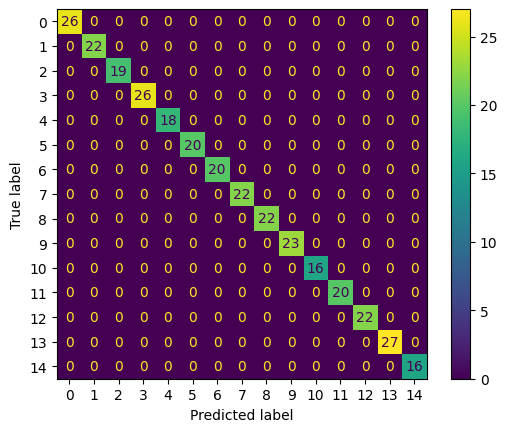

In [54]:
ConfusionMatrixDisplay(cm).plot()

ConfusionMatrixDisplay(cm).plot() is used to visualize the confusion matrix generated from a decision tree model.

The resulting plot will display the confusion matrix, usually as a grid or heatmap, where each cell represents the count or proportion of observations falling into different categories based on their true and predicted labels. This visualization helps in understanding the performance of the decision tree model by visually inspecting the distribution of true positives, true negatives, false positives, and false negatives.

By examining the plot, you can gain insights into how well the decision tree model is classifying the data and identify any patterns or issues such as imbalanced classes or misclassifications that may require further investigation or model improvements.

# Let's try the model with an example

In [55]:
dtc.predict(pd.DataFrame([[50,60,80,23,12.2,5.6,205.12]],columns=['N','P', 'K' ,'temperature' ,'humidity','ph','rainfall']))

array(['Soyabeans'], dtype=object)

This creates a pandas DataFrame with a single row of input data.The predict() method uses the trained decision tree model to predict the target variable for the new input data. The result of the predict() method will be the predicted output or target variable based on the provided input features. It Works!

# Store the training model to using later and avoid starting from scratch

A. Import module pickle

In [56]:
import pickle as pkl

pickle is a module in Python used for object serialization, which allows you to save Python objects to disk and load them back into memory later.

B. Serialize and save the trained decision tree classifier

In [57]:
pkl.dump(dtc, open("decision_tree_model.pkl", "wb"))

Uses pickle to serialize and save the trained decision tree classifier (dtc) to a file named "decision_tree_model.pkl". The file is opened in binary mode ("wb"), indicating that it will be written as a binary file.ou can save the trained model and its associated parameters, allowing you to reuse it later without having to retrain the model from scratch. The saved model file can be shared, stored, or loaded into other Python programs or environments.

C. Loads the saved decision tree model back into memory in an object

In [58]:
 model = pkl.load(open("decision_tree_model.pkl", "rb"))

Loads the saved decision tree model back into memory by using pickle.load(). It opens the "decision_tree_model.pkl" file in binary mode ("rb") and assigns the loaded model to the model variable. Now you can use the loaded model object to make predictions or perform any other operations that the decision tree classifier supports.

D. Lets try the saved decision tree model

In [59]:
model.predict(pd.DataFrame([[90,90,29,83,132,6.8,255.12]],columns=['N','P', 'K' ,'temperature' ,'humidity','ph','rainfall']))

array(['banana'], dtype=object)